In [32]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [34]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [35]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [36]:
conn = engine.connect()

In [37]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [38]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [39]:
# Save references to each table
Measurement = Base.classes.measurement
station = Base.classes.station

In [40]:
# Create our session (link) from Python to the DB
Measurement = Base.classes.measurement
station = Base.classes.station

# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [41]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23')

Text(0, 0.5, 'Inches')

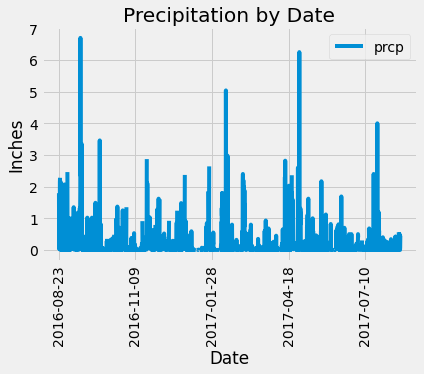

In [42]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
df = pd.read_sql("Select date, prcp from measurement", conn)
df
# Calculate the date one year from the last date in data set.
df1 = df.loc[df["date"]>"2016-08-22"]
df1 = df1.sort_values("date")
df1.plot(x="date", rot=90, y="prcp")
plt.title("Precipitation by Date")
plt.xlabel("Date")
plt.ylabel("Inches")


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data





In [43]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [44]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(station).count()
total_stations

9

In [45]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station = session.query(Measurement.station,func.count(Measurement.station))\
.group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
for stations in active_station:
    print(stations)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [46]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
first_station = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                                filter(Measurement.station =="USC00519281")
for stations in first_station:
    print(stations)

(54.0, 85.0, 71.66378066378067)


In [47]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_id = session.query(Measurement.tobs).filter(Measurement.station == "USC00519281").\
                                filter(Measurement.date>"2016-08-22")
temps=[]
for temp in active_station_id: 
    temps.append(temp[0])
    

<function matplotlib.pyplot.show(*args, **kw)>

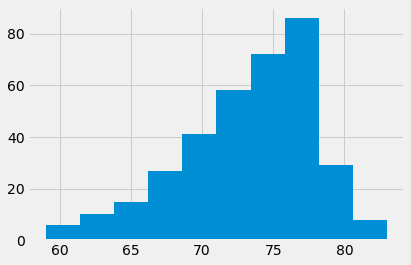

In [52]:
plt.hist(temps)
plt.show

# Close session

In [48]:
# Close Session
session.close()